In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import the Gold dataset in a dataframe
df = pd.read_csv('/home/akshatchauhan/Pictures/intern/Gold/GOLD.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [40]:
# Creating dependent and independent variables
x = df.iloc[:,1:5].values # Independent variables OHLC
y = df.iloc[:,7].values # Pred Values (Dependent Variable)

# 3.1
# Pred column contains values till index 410, so the training data will be till 411 entry
X_train = x[0:411,:]
y_train = y[0:411]

X_test = x[411:,:]

# Import linear regression model
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
regr = LinearRegression()

# Fitting the training data to the model
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# Coefficients in Multiple Linear Regression
print('Coefficients : '+str(regr.coef_))
print('Intercept : '+str(regr.intercept_))

Coefficients : [ 2.  3. -1. -4.]
Intercept : 5.553602022700943e-11


In [42]:
# Predict the value and complete the Pred column
y_pred = regr.predict(X_test)

y[411:] = y_pred

df.Pred[411:] = y_pred

/home/akshatchauhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
# 3.1
# Implementing Polynomial Regression on 'New' column
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)

X_poly = poly_reg.fit_transform(x)
y_new = df.iloc[:,8].values

# Splitting Training and Testing Data
X_train2 = X_poly[0:411,:]
y_train2 = y_new[0:411]

X_test2 = X_poly[411:,:]
y_test2 = y_new[411:]

# Create another Linear Regressor for Polynomial Regression
regr2 = LinearRegression()
regr2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Coefficients in Polynomial Regression
print('Coefficients : '+str(regr2.coef_))
print('Intercept : '+str(regr2.intercept_))

Coefficients : [-7.73895906e-06  1.53442325e-09 -1.66436740e-09  1.16812546e-09
 -1.84293075e-09  4.05184038e-05  3.87173471e-07  3.79408783e-05
  2.02345864e-06 -3.94379000e-05 -2.28731284e-06 -3.77387753e-05
  3.53660744e-05 -6.54906204e-07 -3.60104518e-05 -1.79238728e-06
  2.20842203e-06  3.49761391e-07  2.82375931e-06  1.36889752e-06
 -6.01038635e-06 -1.11861634e-06  3.55903566e-06 -1.84422263e-06
 -1.34611487e-06 -2.32751553e-06  4.18146056e-06  1.41888003e-06
 -4.99556134e-07 -1.34799713e-06 -1.83235170e-07 -3.16594627e-06
  6.50356889e-06 -4.96106836e-06  2.18325805e-06  1.07461528e-10
  7.71793343e-11 -6.79925790e-10  2.37797689e-10 -1.84713629e-10
  2.07132885e-10 -1.44185966e-10  7.08705254e-10  3.95810871e-10
 -5.32862631e-10  1.98232824e-10 -4.72813543e-10  2.06522028e-10
  1.16038303e-10  4.97869728e-10 -2.95460527e-10 -2.03959005e-10
 -1.03707066e-09  4.29170471e-10  3.26755250e-10 -8.17615044e-11
  1.71907395e-10  3.28829336e-11  2.54256468e-10 -6.95042164e-10
  1.737975

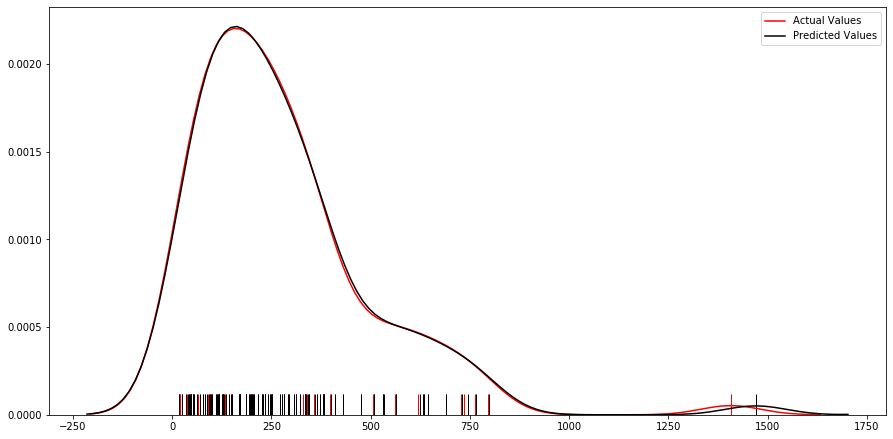

In [45]:
# Comparing the Predicted values ( Polynomial Regression ) and actual values using a plot
# Plotting a displot using seaborn
import seaborn as sns

plt.rcParams["figure.figsize"]=15,7.5
sns.distplot(y_test2,rug = True, hist = False,color = 'red', label = 'Actual Values')
sns.distplot(regr2.predict(X_test2), rug = True, hist = False, color = 'black', label = 'Predicted Values')

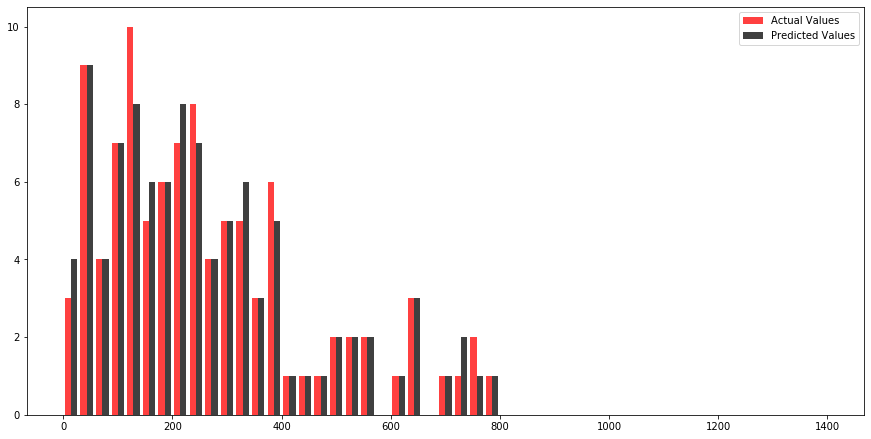

In [46]:
# Plotting a histogram
import seaborn as sns

bins = np.linspace(0,1400,50)
plt.hist([regr2.predict(X_test2),y_test2], bins, color = ['red','black'], alpha = 0.75, label = ['Actual Values', 'Predicted Values'])
plt.legend()
plt.show()

In [50]:
# Adding the Polynomial Regression Column to the dataframe
# new_poly is the column obtained using Polynomial Regression
y_pred2 = regr2.predict(X_test2)

df['new_poly'] = np.concatenate([y_train2,y_pred2])
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,new_poly
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322,247.131100
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158,52.078244
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305,113.232019
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693,48.284219
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,280.0,429.924911,429.867236


In [73]:
# 3.2
# Importing TITAN Stock from Large Cap
df_titan = pd.read_csv('Large_Cap/TITAN.csv')

# Importing Nifty Dataset
df_nifty = pd.read_csv('Nifty50/Nifty50.csv')

In [74]:
# Calculating Daily percent cange in closing price of Titan Stocks and Nifty
df_titan['Day_Perc_Change'] = df_titan['Close Price'].pct_change().values
df_nifty['Day_Perc_Change'] = df_nifty['Close'].pct_change().values

# Replacing the nan value with 0
df_titan.at[0,'Day_Perc_Change'] = 0
df_nifty.at[0,'Day_Perc_Change'] = 0

In [75]:
# Converting the date to datetime object
df_titan['Date'] = pd.to_datetime(df_titan['Date'],format = '%d-%b-%Y')
df_nifty['Date'] = pd.to_datetime(df_nifty['Date'],format = '%d-%b-%Y')

In [76]:
# Setting the Date as index
df_titan.set_index('Date',inplace=True)
df_nifty.set_index('Date',inplace=True)

In [98]:
# Creating a filter for the past 3 months
# Assuming the latest date as current date
import datetime

cur_date1 = max(df_nifty.index)
l_date1 = cur_date1 - datetime.timedelta(days = 90)

cur_date2 = max(df_titan.index)
l_date2 = cur_date2 - datetime.timedelta(days = 90)

filt1 = (df_nifty.index <= cur_date1) & (df_nifty.index >= l_date1)
filt2 = (df_titan.index <= cur_date2) & (df_titan.index > l_date2)

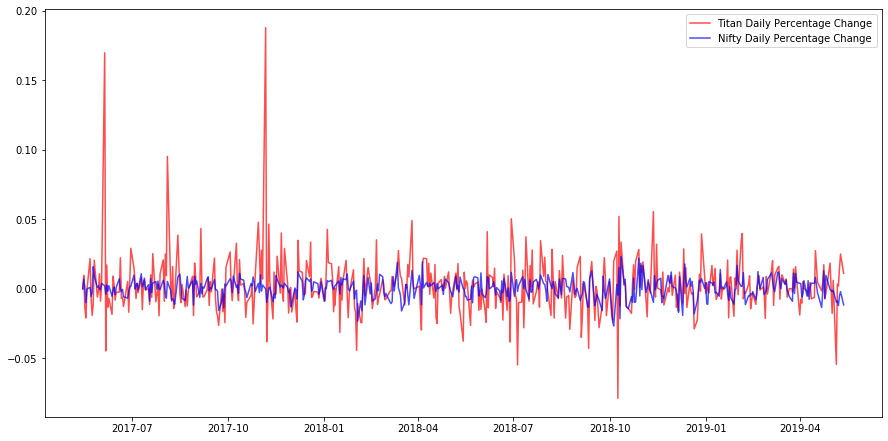

In [105]:
# Plotting the percentage change of Titan and Nifty
plt.plot(df_titan['Day_Perc_Change'],'red', label = 'Titan Daily Percentage Change', alpha = 0.7)
plt.plot(df_nifty['Day_Perc_Change'],'blue', label = 'Nifty Daily Percentage Change', alpha = 0.7)
plt.legend()

In [109]:
# Calculating the Beta values for the past 3 months of Titan
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df_nifty[filt1]['Day_Perc_Change'], df_titan[filt2]['Day_Perc_Change'])
print('Beta : ',slope)

Beta :  0.565895215733655


In [113]:
# Creating a new dataframe of Nifty and Titan that contains data of the last day of each month
df_titan_monthly = df_titan.resample('M').last()
df_nifty_monthly = df_nifty.resample('M').last()

In [118]:
# Calculating Monthly Percentage Change in Nifty and Titan
df_titan_monthly['Monthly_Change'] = df_titan_monthly['Close Price'].pct_change()

df_nifty_monthly['Monthly_Change'] = df_nifty_monthly['Close'].pct_change()

df_nifty_monthly['Monthly_Change'].replace(np.nan, 0, inplace = True)
df_titan_monthly['Monthly_Change'].replace(np.nan, 0, inplace = True)

In [120]:
# Calculating Monthly Beta Value
slope, intercept, r, p, std_err = stats.linregress(df_nifty_monthly['Monthly_Change'], df_titan_monthly['Monthly_Change'])
print('Beta : ',slope)

Beta :  0.42548017718681524


# Beta Values inferences

A stock that swings more than the market over time has a beta above 1.0. 

If a stock moves less than the market, the stock's beta is less than 1.0. 
High-beta stocks are supposed to be riskier but provide higher return potential. Low-beta stocks pose less risk but also lower returns.


The monthly beta value for Titan Stock comes out to be ~ 0.425.
0.425 < 1.0
It means that Titan stock moves less than the Market. So, it provides low risk but also low returns.